In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
import gc
import numpy as np
from sklearn.datasets import load_files
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ" -O 10_painting.zip && rm -rf /tmp/cookies.txt

--2023-06-30 15:04:03--  https://docs.google.com/uc?export=download&confirm=t&id=1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ
Resolving docs.google.com (docs.google.com)... 142.251.12.139, 142.251.12.113, 142.251.12.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.12.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nu9h0h2j5ikjth3ftkli6t308lptod1r/1688137425000/14533323077134147075/*/1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ?e=download&uuid=eb3b5989-1d83-4f2b-ae66-13654c0e1ed5 [following]
--2023-06-30 15:04:04--  https://doc-00-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nu9h0h2j5ikjth3ftkli6t308lptod1r/1688137425000/14533323077134147075/*/1-5Y_bbsUogkAlEz3f-4CflbT40jg-UFJ?e=download&uuid=eb3b5989-1d83-4f2b-ae66-13654c0e1ed5
Resolving doc-00-3c-docs.googleusercontent.com (doc-00-3c-docs.googleusercontent.com)... 74.125.24.132, 2

In [7]:
!unzip -q 10_real.zip

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D" -O 10_real.zip && rm -rf /tmp/cookies.txt

--2023-06-30 15:04:08--  https://docs.google.com/uc?export=download&confirm=t&id=1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D
Resolving docs.google.com (docs.google.com)... 142.251.12.139, 142.251.12.113, 142.251.12.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.12.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b73bk0phh6dhll98ae71hvmhvclikp30/1688137425000/14533323077134147075/*/1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D?e=download&uuid=1cf94724-c12b-422f-920a-c7fb5570532a [following]
--2023-06-30 15:04:10--  https://doc-0c-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b73bk0phh6dhll98ae71hvmhvclikp30/1688137425000/14533323077134147075/*/1ICRO0C8XY9LYR5UPxbHowV1Yxfybkh0D?e=download&uuid=1cf94724-c12b-422f-920a-c7fb5570532a
Resolving doc-0c-3c-docs.googleusercontent.com (doc-0c-3c-docs.googleusercontent.com)... 74.125.24.132, 2

In [5]:
!unzip -q 10_painting.zip

In [8]:
# ctreate tf batch datasets
real_images_dst = tf.keras.preprocessing.image_dataset_from_directory(
    directory='real/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(32, 32),
)

painting_images_dst = tf.keras.utils.image_dataset_from_directory(
    directory='painting/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=((32, 32)),
)

Found 4653 files belonging to 10 classes.
Found 2287 files belonging to 10 classes.


In [9]:
#attempting to convert a TensorFlow batch dataset into NumPy arrays
real_images_list = list(real_images_dst.as_numpy_iterator())
x_real = np.concatenate([x for x, _ in real_images_list])
y_real = np.concatenate([y for _, y in real_images_list])
print("x_real shape:", x_real.shape)
print("y_real shape:", y_real.shape)

x_real shape: (4653, 32, 32, 3)
y_real shape: (4653, 10)


In [10]:
#attempting to convert a TensorFlow batch dataset into NumPy arrays
painting_images_list = list(painting_images_dst.as_numpy_iterator())
x_painting = np.concatenate([x for x, _ in painting_images_list])
y_painting = np.concatenate([y for _, y in painting_images_list])
print("x_painting shape:", x_painting.shape)
print("y_painting shape:", y_painting.shape)

x_painting shape: (2287, 32, 32, 3)
y_painting shape: (2287, 10)


In [11]:
x_real = x_real / 255.0
x_painting = x_painting / 255.0
# x_train = (x_train / 255.0) * 2 - 1
# x_test = (x_test / 255.0) * 2 - 1

In [12]:
# only 4653 real data for train -->
augmentation_model = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])


In [13]:
# augment real data
x_real_aug=x_real.copy()
y_real_aug=y_real.copy()
for i in range(11):
  x_real_aug = np.concatenate([x_real_aug,augmentation_model(x_real).numpy()]) # 2x times each time
  y_real_aug  = np.concatenate([y_real_aug, y_real])

In [14]:
np.min(x_real_aug)

0.0

In [15]:
np.max(x_real_aug)

1.0

In [16]:
x_real_aug.shape,y_real_aug.shape

((55836, 32, 32, 3), (55836, 10))

In [17]:
# encoder
input = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
encoded_latent = layers.Flatten()(x)

encoder = Model(input, encoded_latent)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496 

In [18]:
# decoder
d = layers.Reshape((4, 4, 64*4))(encoded_latent)
d = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(d)
d = layers.BatchNormalization()(d)
d = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(d)
d = layers.BatchNormalization()(d)
d = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(d)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(d)

autoencoder = Model(input, decoder_output)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          1849

In [19]:
history=autoencoder.fit(x_real_aug, x_real_aug,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_split=0.2)

Epoch 1/50
349/349 [==============================] - 21s 18ms/step - loss: 0.4694 - val_loss: 0.5897
Epoch 2/50
349/349 [==============================] - 6s 17ms/step - loss: 0.4403 - val_loss: 0.4414
Epoch 3/50
349/349 [==============================] - 6s 16ms/step - loss: 0.4348 - val_loss: 0.4369
Epoch 4/50
349/349 [==============================] - 4s 13ms/step - loss: 0.4317 - val_loss: 0.4338
Epoch 5/50
349/349 [==============================] - 4s 13ms/step - loss: 0.4298 - val_loss: 0.4330
Epoch 6/50
349/349 [==============================] - 5s 14ms/step - loss: 0.4280 - val_loss: 0.4305
Epoch 7/50
349/349 [==============================] - 5s 14ms/step - loss: 0.4269 - val_loss: 0.4291
Epoch 8/50
349/349 [==============================] - 5s 14ms/step - loss: 0.4259 - val_loss: 0.4309
Epoch 9/50
349/349 [==============================] - 5s 13ms/step - loss: 0.4246 - val_loss: 0.4286
Epoch 10/50
349/349 [==============================] - 5s 14ms/step - loss: 0.4237 - val_l

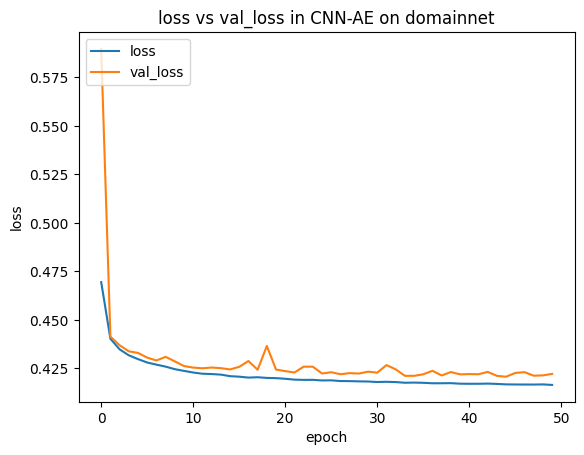

In [20]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs val_loss in CNN-AE on domainnet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [21]:
paint_reconstructed = autoencoder.predict(x_painting)

72/72 [==============================] - 0s 4ms/step


In [22]:
(paint_reconstructed).shape

(2287, 32, 32, 3)

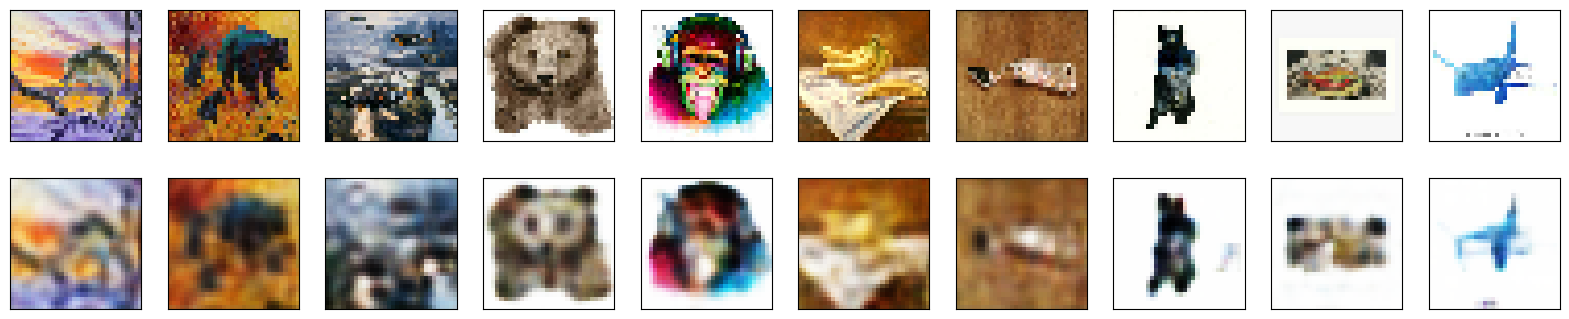

In [23]:
# VISULAIZE PREDICTION(RECONSTRUCTION) OF TRIANED MODEL(BY REAL DATA) ON PAINTING
plt.figure(figsize=(20, 4))
for i in range(10):
        # Display original
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(x_painting[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, 10, i + 1 + 10)
        plt.imshow(paint_reconstructed[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
encoder_real_featutres = encoder.predict(x_real)
encoder_real_clf = RandomForestClassifier(max_depth=10, random_state=0,warm_start=True, n_estimators=1)
encoder_real_clf.fit(encoder_real_featutres, y_real)

146/146 [==============================] - 0s 2ms/step


RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0,
                       warm_start=True)

In [25]:
encoder_real_featutres.shape

(4653, 4096)

In [26]:
# get accuracy on painting with clf with no training
encoder_painting_test_features = encoder.predict(x_painting)
painting_pred = encoder_real_clf.predict(encoder_painting_test_features)
accuracy_score(y_painting,painting_pred)

72/72 [==============================] - 0s 2ms/step


0.11324879755137734

In [27]:
## to get accuracy on painting with training clf --> split paints to train and test for training.
from sklearn.model_selection import train_test_split
x_paint_train, x_paint_test, y_paint_train, y_paint_test = train_test_split(x_painting, y_painting, test_size=0.2, random_state=42)

In [28]:
## get accuracy on painting with training clf
paint_train_latent = encoder(x_paint_train)
encoder_real_clf.fit(paint_train_latent,y_paint_train)# warm_start=true

paint_test_latent = encoder(x_paint_test)
pred_paint_test = encoder_real_clf.predict(paint_test_latent)
accuracy_score(y_paint_test,pred_paint_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


0.1222707423580786

In [ ]:
#####################   GAN PART IN Q2##############

In [29]:
d_input = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (4, 4), strides=2, padding="same")(d_input)
x = layers.LeakyReLU(alpha=0.2)(x)
x = layers.Conv2D(128, (4, 4), strides=2, padding="same")(x)
x = layers.LeakyReLU(alpha=0.2)(x)
x = layers.Conv2D(128, (4, 4), strides=2, padding="same")(x)
x = layers.LeakyReLU(alpha=0.2)(x)
x = layers.Conv2D(256, (4, 4), strides=2, padding="same")(x)
x = layers.LeakyReLU(alpha=0.2)(x)
features = layers.Flatten()(x)
x = layers.Dropout(0.4)(features)
x = layers.Dense(1, activation="sigmoid")(x)

discriminator = Model(d_input, x, name='discriminator')
feature_model = Model(d_input, features, name='feature_model')
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4, 4, 128)       

In [30]:
generator = tf.keras.Sequential(
    [
        layers.Input(shape=(100,)),
        layers.Dense(256*4*4),
        layers.Reshape((4, 4, 256)),
        layers.Conv2DTranspose(128, (4, 4), strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, (3, 3), padding="same", activation="tanh"),
    ],
    name='generator'
)

generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4096)              413696    
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 8, 8, 128)        524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0 

In [31]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # print(real_images.shape)
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)
        # Combine them with real images
        combined_images = tf.concat([real_images, generated_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        # labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.ones((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        self.discriminator.trainable=False
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        self.discriminator.trainable=True
        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

In [32]:
gan = GAN(discriminator=discriminator, generator=generator, latent_dim=100)

In [33]:
gc.collect()

732

In [34]:
# x_real_aug = (x_real_aug / 255.0) * 2 - 1

In [35]:
x_real_aug_ = x_real_aug  * 2 - 1

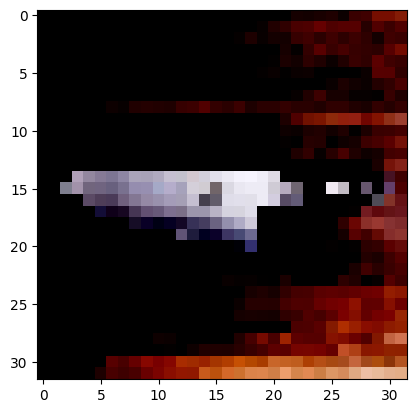

In [36]:
plt.imshow(x_real_aug_[0])

In [37]:
np.min(x_real_aug_)

-1.0

In [38]:
gan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss_fn=tf.keras.losses.BinaryCrossentropy(),
)

history=gan.fit(
    x_real_aug_,
    epochs=30,
    batch_size=128,
    shuffle=True
)

Epoch 1/30
437/437 [==============================] - 36s 68ms/step - d_loss: 0.4920 - g_loss: 1.5976
Epoch 2/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.5865 - g_loss: 1.2241
Epoch 3/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.6025 - g_loss: 1.1156
Epoch 4/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.6053 - g_loss: 1.0515
Epoch 5/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.6023 - g_loss: 1.0727
Epoch 6/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.5883 - g_loss: 1.1378
Epoch 7/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.5541 - g_loss: 1.2273
Epoch 8/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.5375 - g_loss: 1.2750
Epoch 9/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.5365 - g_loss: 1.2518
Epoch 10/30
437/437 [==============================] - 29s 66ms/step - d_loss: 0.5

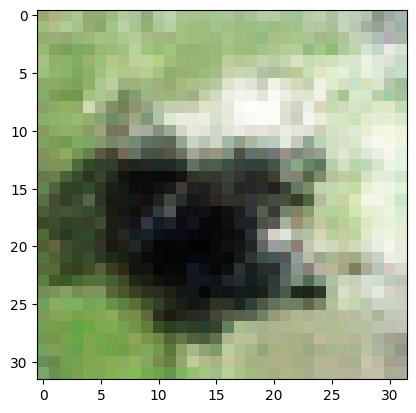

In [39]:
noise = tf.random.normal(shape=(1, 100))
pic = generator(noise)
pic = (pic+1)/2
plt.imshow(pic[0])

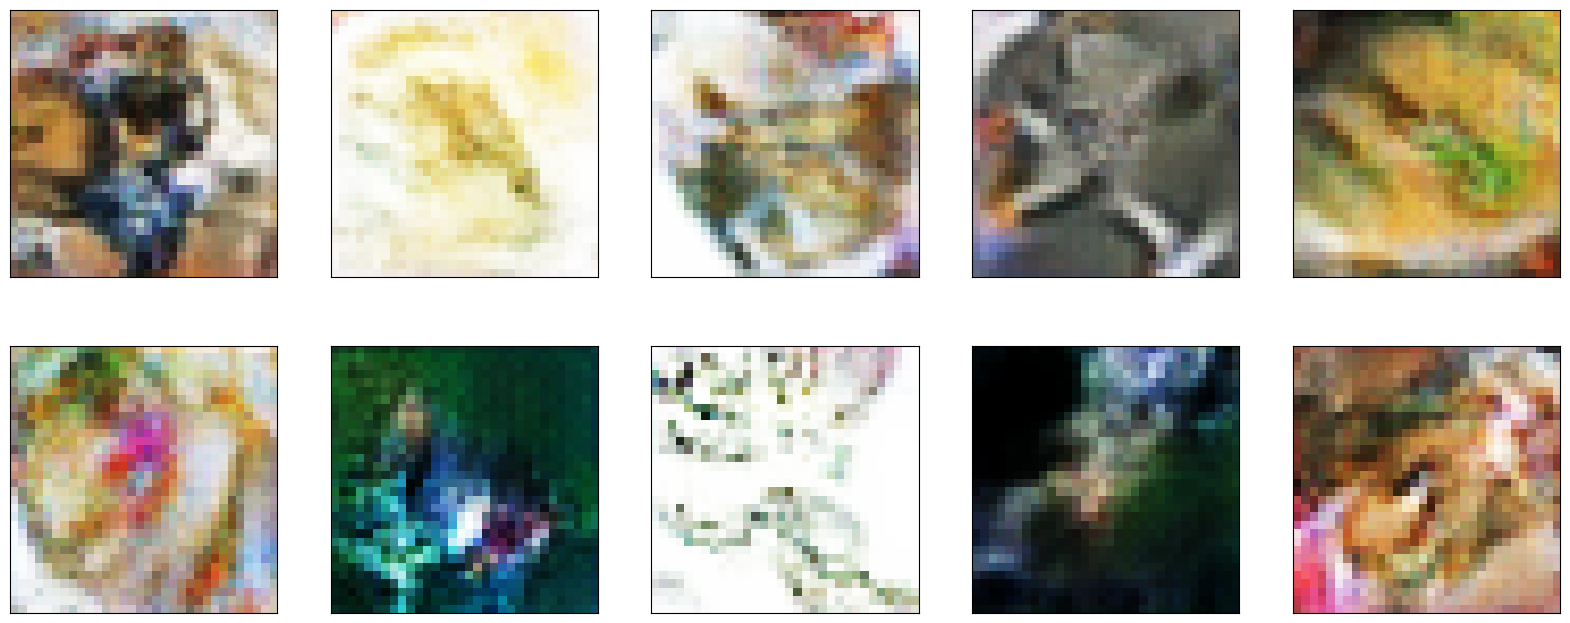

In [40]:
plt.figure(figsize=(20, 8))
for i in range(10):
        noise = tf.random.normal(shape=(1, 100))
        pic = generator(noise)
        pic = (pic+1)/2
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(pic[0])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


plt.show()

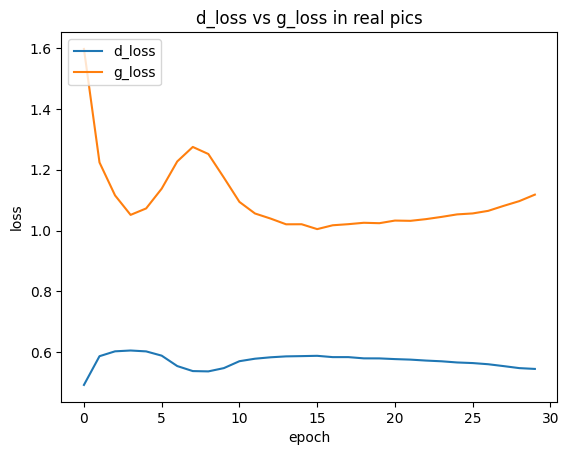

In [41]:
from matplotlib import pyplot as plt
plt.plot(history.history['d_loss'])
plt.plot(history.history['g_loss'])
plt.title('d_loss vs g_loss in real pics')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['d_loss', 'g_loss'], loc='upper left')
plt.show()

In [42]:
desc_real_featutres = feature_model.predict(x_real)
desc_real_clf = RandomForestClassifier(max_depth=10, random_state=0,warm_start=True, n_estimators=1)
desc_real_clf.fit(desc_real_featutres, y_real)

146/146 [==============================] - 1s 2ms/step


RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0,
                       warm_start=True)

In [47]:
# get accuracy on painting with clf with no training - gan
desc_painting_test_features = feature_model.predict(x_painting)
desc_painting_pred = desc_real_clf.predict(desc_painting_test_features
                                           )
accuracy_score(y_painting,desc_painting_pred)

72/72 [==============================] - 0s 2ms/step


0.15522518583296896

In [48]:
## get accuracy on painting with training clf
paint_train_latent = feature_model(x_paint_train)
desc_real_clf.fit(paint_train_latent,y_paint_train)# warm_start=true

paint_test_latent = feature_model(x_paint_test)
pred_paint_test = desc_real_clf.predict(paint_test_latent)
accuracy_score(y_paint_test,pred_paint_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


0.14847161572052403